In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd 

style.use('ggplot')

In [4]:
class K_Means:
	def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
		self.k = k
		self.tolerance = tolerance
		self.max_iterations = max_iterations


	def fit(self, data):

		self.centroids = {}

		#inicializar los centroides, los primeros elementos 'k' en el conjunto de datos serán nuestros centroides iniciales
		for i in range(self.k):
			self.centroids[i] = data[i]

		#iniciar iteraciones
		for i in range(self.max_iterations):
			self.classes = {}
			for i in range(self.k):
				self.classes[i] = []

			# Buscar la distancia entre el punto mas cercano y el cluster; eligio el punto mas cercano al cetroid
			for features in data:
				distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
				classification = distances.index(min(distances))
				self.distances = classification;
				self.classes[classification].append(features)

			previous = dict(self.centroids)

			#promediar los puntos de datos del clúster para volver a calcular los centroides
			for classification in self.classes:
				self.centroids[classification] = np.average(self.classes[classification], axis = 0)

			isOptimal = True

			for centroid in self.centroids:

				original_centroid = previous[centroid]
				curr = self.centroids[centroid]

				if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
					isOptimal = False

			#salir del bucle principal si los resultados son óptimos, es decir. los centroides no cambian mucho sus posiciones (más que nuestra tolerancia)
			if isOptimal:
                
				# Buscar la distancia entre el punto mas cercano y el cluster; eligio el punto mas cercano al cetroid
				for features in data:
					distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
					classification = distances.index(min(distances))
					print(features," ", classification)
					self.distances = classification;
					self.classes[classification].append(features)
				break

	def pred(self, data):
		distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
		classification = distances.index(min(distances))
		return classification

[5.1 3.5 1.4 0.2]   2
[4.9 3.  1.4 0.2]   2
[4.7 3.2 1.3 0.2]   2
[4.6 3.1 1.5 0.2]   2
[5.  3.6 1.4 0.2]   2
[5.4 3.9 1.7 0.4]   2
[4.6 3.4 1.4 0.3]   2
[5.  3.4 1.5 0.2]   2
[4.4 2.9 1.4 0.2]   2
[4.9 3.1 1.5 0.1]   2
[5.4 3.7 1.5 0.2]   2
[4.8 3.4 1.6 0.2]   2
[4.8 3.  1.4 0.1]   2
[4.3 3.  1.1 0.1]   2
[5.8 4.  1.2 0.2]   2
[5.7 4.4 1.5 0.4]   2
[5.4 3.9 1.3 0.4]   2
[5.1 3.5 1.4 0.3]   2
[5.7 3.8 1.7 0.3]   2
[5.1 3.8 1.5 0.3]   2
[5.4 3.4 1.7 0.2]   2
[5.1 3.7 1.5 0.4]   2
[4.6 3.6 1.  0.2]   2
[5.1 3.3 1.7 0.5]   2
[4.8 3.4 1.9 0.2]   2
[5.  3.  1.6 0.2]   2
[5.  3.4 1.6 0.4]   2
[5.2 3.5 1.5 0.2]   2
[5.2 3.4 1.4 0.2]   2
[4.7 3.2 1.6 0.2]   2
[4.8 3.1 1.6 0.2]   2
[5.4 3.4 1.5 0.4]   2
[5.2 4.1 1.5 0.1]   2
[5.5 4.2 1.4 0.2]   2
[4.9 3.1 1.5 0.1]   2
[5.  3.2 1.2 0.2]   2
[5.5 3.5 1.3 0.2]   2
[4.9 3.1 1.5 0.1]   2
[4.4 3.  1.3 0.2]   2
[5.1 3.4 1.5 0.2]   2
[5.  3.5 1.3 0.3]   2
[4.5 2.3 1.3 0.3]   2
[4.4 3.2 1.3 0.2]   2
[5.  3.5 1.6 0.6]   2
[5.1 3.8 1.9 0.4]   2
[4.8 3.  1

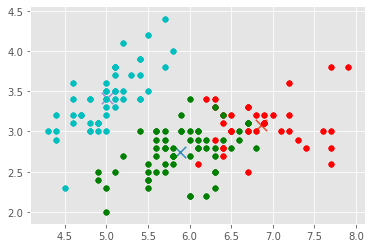

In [5]:
def main():
	df = pd.read_csv(r"data/iris.csv")
	df = df[['sepal_length','sepal_width','petal_length','petal_width']]
	dataset = df.astype(float).values.tolist()

	X = df.values #returns a numpy array
	
	km = K_Means(3)
    
	km.fit(X)

	# Plotting starts here
	colors = 10*["r", "g", "c", "b", "k"]

	for centroid in km.centroids:
		plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")
        
	for classification in km.classes:
		color = colors[classification]
		for features in km.classes[classification]:
			plt.scatter(features[0], features[1], color = color,s = 30)
	
	plt.show()


if __name__ == "__main__":
	main()